<a href="https://colab.research.google.com/github/LPValente/TensorFlow2.0/blob/main/TF2_0_ANN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Tensorflow
!pip install -q tensorflow-gpu==2.0.0-betal
import tensorflow as tf
print(tf.__version__)

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-betal (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-betal
2.12.0


In [ ]:
# Other imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Make the dataset
N = 1000
X = np.random.random((N,2)) * 6 - 3 #uniformly distribuited between (-3, +3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

This implements the function:

<center>$y = cos(2x_{1})+cos(3x_{2})$</center>

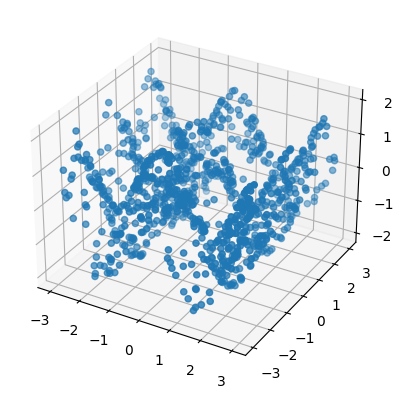

In [ ]:
# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
# plt.show()


In [ ]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
# Compile and fit
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.9549
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9173
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9066
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8663
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8275
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7699
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6893
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6228
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6068
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5830
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5298
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5381
Epoch 13/100
32/32 [=================

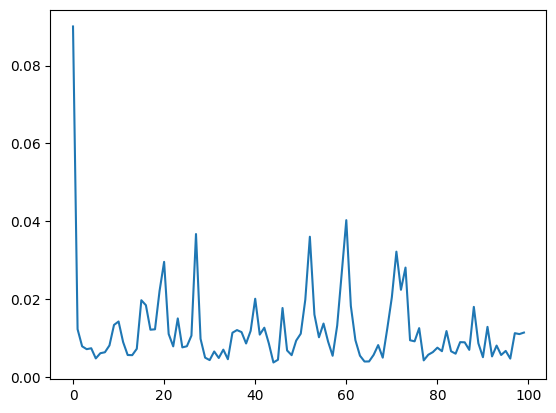

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

79/79 [==============================] - 0s 1ms/step


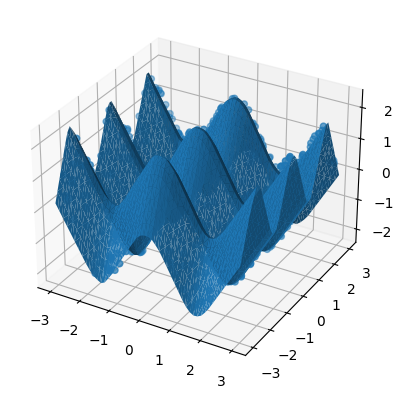

In [ ]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3,3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

79/79 [==============================] - 0s 1ms/step


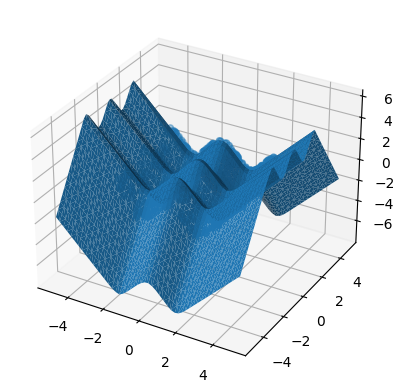

In [ ]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1],Y)

# surface plt
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()